Data Diri

Nama : Kencana Dwi Putri     
Username Dicoding : Kencanadp

In [2]:
#package library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [3]:
#melakukan download file berupa zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-06 07:07:38--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.14MB/s    in 52s     

2020-10-06 07:08:31 (5.90 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
import zipfile
#membuat variabel untuk direktori
local_zip = '/tmp/rockpaperscissors.zip'
#ekstrak file
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')

In [5]:
#membuat nama direktori
base_dir = '/tmp/rockpaperscissors'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
train_dir = os.path.join(base_dir,'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

In [6]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [7]:
#data validasi
train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, validation_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [8]:
train_rock = os.path.join(train_dir,'rock')
if not os.path.exists(train_rock):
    os.mkdir(train_rock)
train_paper = os.path.join(train_dir,'paper')
if not os.path.exists(train_paper):
    os.mkdir(train_paper)
train_scissors = os.path.join(train_dir,'scissors')
if not os.path.exists(train_scissors):
    os.mkdir(train_scissors)

validation_rock = os.path.join(validation_dir,'rock')
if not os.path.exists(validation_rock):
    os.mkdir(validation_rock)
validation_paper = os.path.join(validation_dir,'paper')
if not os.path.exists(validation_paper):
    os.mkdir(validation_paper)
validation_scissors = os.path.join(validation_dir,'scissors')
if not os.path.exists(validation_scissors):
    os.mkdir(validation_scissors)

In [9]:
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in validation_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(validation_rock,i))
for i in validation_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(validation_paper,i))
for i in validation_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(validation_scissors,i))

In [10]:
#augmentasi gambar

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest')

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [12]:
#membuat model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), padding='same', activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), padding='same', activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), padding='same', activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [13]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 256)       2

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2
)

Epoch 1/20
25/25 - 7s - loss: 1.1585 - accuracy: 0.4162 - val_loss: 0.9965 - val_accuracy: 0.4875
Epoch 2/20
25/25 - 7s - loss: 0.9205 - accuracy: 0.5525 - val_loss: 0.7664 - val_accuracy: 0.7375
Epoch 3/20
25/25 - 7s - loss: 0.7078 - accuracy: 0.7275 - val_loss: 0.7231 - val_accuracy: 0.6812
Epoch 4/20
25/25 - 7s - loss: 0.4587 - accuracy: 0.8250 - val_loss: 0.2844 - val_accuracy: 0.9000
Epoch 5/20
25/25 - 7s - loss: 0.3316 - accuracy: 0.8763 - val_loss: 0.2786 - val_accuracy: 0.8875
Epoch 6/20
25/25 - 7s - loss: 0.3102 - accuracy: 0.8875 - val_loss: 0.1914 - val_accuracy: 0.9312
Epoch 7/20
25/25 - 7s - loss: 0.2712 - accuracy: 0.9062 - val_loss: 0.1931 - val_accuracy: 0.9438
Epoch 8/20
25/25 - 7s - loss: 0.2326 - accuracy: 0.9175 - val_loss: 0.1400 - val_accuracy: 0.9625
Epoch 9/20
25/25 - 7s - loss: 0.2294 - accuracy: 0.9175 - val_loss: 0.1675 - val_accuracy: 0.9312
Epoch 10/20
25/25 - 7s - loss: 0.1119 - accuracy: 0.9563 - val_loss: 0.1244 - val_accuracy: 0.9563
Epoch 11/20
25/25 -

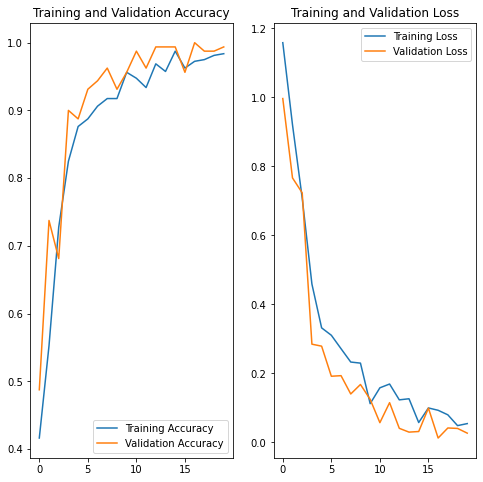

In [16]:
#plot akurasi dan loss data

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Grafik memperlihatkan bahwa accuracy dan vall accuracy dari waktu ke waktu semakin meningkat dan tidak overfitting. Nilai loss dan vall loss juga dari waktu ke waktu semakin turun.
Jadi, model yang telah dibuat sudah lumayan bagus.

Saving IMG_20200823_215221.jpg to IMG_20200823_215221.jpg
IMG_20200823_215221.jpg
paper


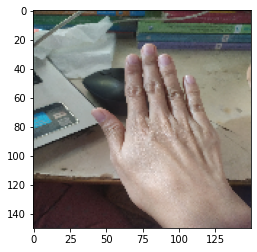

In [18]:
#hasil dari model yang telah dibuat
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')